In [1]:
from urllib.request import urlretrieve

italy_covid_url = 'https://gist.githubusercontent.com/aakashns/f6a004fa20c84fec53262f9a8bfee775/raw/f309558b1cf5103424cef58e2ecb8704dcd4d74c/italy-covid-daywise.csv'

urlretrieve(italy_covid_url, 'italy-covid-daywise.csv')

('italy-covid-daywise.csv', <http.client.HTTPMessage at 0x1b1675e04d0>)

In [2]:
import pandas as pd

covid_df = pd.read_csv('italy-covid-daywise.csv')

covid_df['year'] = pd.DatetimeIndex(covid_df.date).year
covid_df['month'] = pd.DatetimeIndex(covid_df.date).month
covid_df['day'] = pd.DatetimeIndex(covid_df.date).day
covid_df['weekday'] = pd.DatetimeIndex(covid_df.date).weekday

covid_df.groupby('weekday')[['new_cases', 'new_deaths', 'new_tests']].mean()
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5
...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2


<Axes: xlabel='date'>

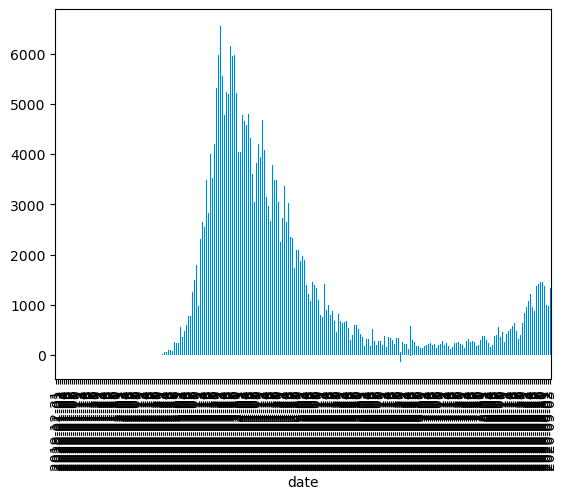

In [3]:
from urllib.request import urlretrieve
import pandas as pd


urlretrieve('https://gist.githubusercontent.com/aakashns/8684589ef4f266116cdce023377fc9c8/raw/99ce3826b2a9d1e6d0bde7e9e559fc8b6e9ac88b/locations.csv', 
            'locations.csv')

locations_df = pd.read_csv('locations.csv')

covid_df['location'] = 'Italy'

merged_df = covid_df.merge(locations_df, on='location')

result_df = merged_df[['date',
                       'new_cases', 
                       'new_deaths', 
                       'new_tests',
                       'location'
                       ]]

result_df.set_index('date', inplace=True)

result_df['new_cases'].plot(kind='bar')
result_df['new_deaths'].plot(kind='bar')